## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  87.130291   481.163287  0.670480   6.853798  1.511315
1  47.665308   673.423196  0.232831   3.414288  1.100204
2  53.033475   628.739796  0.630155   1.112918  1.434708
3   8.495270  1372.384595  0.194376  10.852766  1.663913
4  92.560928   735.144370  0.540643   6.848132  1.402620


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0155342	total: 57.2ms	remaining: 57.2s
1:	learn: 1.0068556	total: 57.6ms	remaining: 28.8s
2:	learn: 0.9970500	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9858426	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9748962	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9678302	total: 59.6ms	remaining: 9.88s
6:	learn: 0.9590804	total: 60.1ms	remaining: 8.52s
7:	learn: 0.9505375	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9422599	total: 61ms	remaining: 6.72s
9:	learn: 0.9317465	total: 61.5ms	remaining: 6.09s
10:	learn: 0.9247221	total: 61.9ms	remaining: 5.57s
11:	learn: 0.9150682	total: 62.3ms	remaining: 5.13s
12:	learn: 0.9068870	total: 62.9ms	remaining: 4.78s
13:	learn: 0.8980936	total: 63.4ms	remaining: 4.46s
14:	learn: 0.8890057	total: 63.8ms	remaining: 4.19s
15:	learn: 0.8816364	total: 64.2ms	remaining: 3.95s
16:	learn: 0.8734105	total: 64.8ms	remaining: 3.75s
17:	learn: 0.8688002	total: 65.3ms	remaining: 3.56s
18:	learn: 0.8615851	total: 65.8ms	remaining: 

136:	learn: 0.3891283	total: 117ms	remaining: 735ms
137:	learn: 0.3873070	total: 117ms	remaining: 732ms
138:	learn: 0.3851640	total: 118ms	remaining: 728ms
139:	learn: 0.3834030	total: 118ms	remaining: 725ms
140:	learn: 0.3812616	total: 119ms	remaining: 722ms
141:	learn: 0.3787325	total: 119ms	remaining: 718ms
142:	learn: 0.3767638	total: 119ms	remaining: 715ms
143:	learn: 0.3749010	total: 120ms	remaining: 712ms
144:	learn: 0.3728048	total: 120ms	remaining: 710ms
145:	learn: 0.3707081	total: 121ms	remaining: 706ms
146:	learn: 0.3685214	total: 121ms	remaining: 704ms
147:	learn: 0.3668631	total: 122ms	remaining: 701ms
148:	learn: 0.3652188	total: 122ms	remaining: 697ms
149:	learn: 0.3633217	total: 122ms	remaining: 694ms
150:	learn: 0.3618540	total: 123ms	remaining: 691ms
151:	learn: 0.3600973	total: 123ms	remaining: 688ms
152:	learn: 0.3582987	total: 124ms	remaining: 685ms
153:	learn: 0.3567212	total: 124ms	remaining: 682ms
154:	learn: 0.3551471	total: 125ms	remaining: 679ms
155:	learn: 

295:	learn: 0.2097181	total: 186ms	remaining: 442ms
296:	learn: 0.2092509	total: 187ms	remaining: 442ms
297:	learn: 0.2084368	total: 187ms	remaining: 440ms
298:	learn: 0.2080366	total: 187ms	remaining: 439ms
299:	learn: 0.2071337	total: 188ms	remaining: 438ms
300:	learn: 0.2068078	total: 188ms	remaining: 437ms
301:	learn: 0.2064512	total: 188ms	remaining: 436ms
302:	learn: 0.2056157	total: 189ms	remaining: 435ms
303:	learn: 0.2047181	total: 189ms	remaining: 433ms
304:	learn: 0.2043626	total: 190ms	remaining: 433ms
305:	learn: 0.2035091	total: 190ms	remaining: 431ms
306:	learn: 0.2026430	total: 191ms	remaining: 430ms
307:	learn: 0.2023291	total: 191ms	remaining: 429ms
308:	learn: 0.2014335	total: 192ms	remaining: 428ms
309:	learn: 0.2011256	total: 192ms	remaining: 427ms
310:	learn: 0.2008223	total: 192ms	remaining: 426ms
311:	learn: 0.1999515	total: 193ms	remaining: 425ms
312:	learn: 0.1995801	total: 193ms	remaining: 424ms
313:	learn: 0.1992878	total: 194ms	remaining: 423ms
314:	learn: 

555:	learn: 0.1122016	total: 298ms	remaining: 238ms
556:	learn: 0.1119000	total: 299ms	remaining: 238ms
557:	learn: 0.1118530	total: 299ms	remaining: 237ms
558:	learn: 0.1115628	total: 300ms	remaining: 236ms
559:	learn: 0.1112887	total: 300ms	remaining: 236ms
560:	learn: 0.1112174	total: 301ms	remaining: 235ms
561:	learn: 0.1107881	total: 301ms	remaining: 234ms
562:	learn: 0.1106653	total: 301ms	remaining: 234ms
563:	learn: 0.1105448	total: 301ms	remaining: 233ms
564:	learn: 0.1104266	total: 302ms	remaining: 232ms
565:	learn: 0.1100375	total: 302ms	remaining: 232ms
566:	learn: 0.1099733	total: 303ms	remaining: 231ms
567:	learn: 0.1096576	total: 303ms	remaining: 231ms
568:	learn: 0.1095944	total: 304ms	remaining: 230ms
569:	learn: 0.1094789	total: 304ms	remaining: 229ms
570:	learn: 0.1091233	total: 304ms	remaining: 229ms
571:	learn: 0.1088355	total: 305ms	remaining: 228ms
572:	learn: 0.1087735	total: 305ms	remaining: 227ms
573:	learn: 0.1084654	total: 306ms	remaining: 227ms
574:	learn: 

714:	learn: 0.0824568	total: 367ms	remaining: 146ms
715:	learn: 0.0822305	total: 368ms	remaining: 146ms
716:	learn: 0.0820057	total: 368ms	remaining: 145ms
717:	learn: 0.0819606	total: 369ms	remaining: 145ms
718:	learn: 0.0819163	total: 369ms	remaining: 144ms
719:	learn: 0.0816538	total: 370ms	remaining: 144ms
720:	learn: 0.0815114	total: 370ms	remaining: 143ms
721:	learn: 0.0813775	total: 371ms	remaining: 143ms
722:	learn: 0.0813342	total: 371ms	remaining: 142ms
723:	learn: 0.0811780	total: 371ms	remaining: 142ms
724:	learn: 0.0808263	total: 372ms	remaining: 141ms
725:	learn: 0.0805709	total: 372ms	remaining: 141ms
726:	learn: 0.0803552	total: 373ms	remaining: 140ms
727:	learn: 0.0803207	total: 373ms	remaining: 139ms
728:	learn: 0.0800716	total: 374ms	remaining: 139ms
729:	learn: 0.0798537	total: 374ms	remaining: 138ms
730:	learn: 0.0797269	total: 375ms	remaining: 138ms
731:	learn: 0.0794869	total: 375ms	remaining: 137ms
732:	learn: 0.0793657	total: 376ms	remaining: 137ms
733:	learn: 

980:	learn: 0.0441128	total: 480ms	remaining: 9.3ms
981:	learn: 0.0440131	total: 481ms	remaining: 8.81ms
982:	learn: 0.0439276	total: 481ms	remaining: 8.32ms
983:	learn: 0.0437979	total: 482ms	remaining: 7.83ms
984:	learn: 0.0435851	total: 482ms	remaining: 7.34ms
985:	learn: 0.0434868	total: 483ms	remaining: 6.85ms
986:	learn: 0.0434039	total: 483ms	remaining: 6.36ms
987:	learn: 0.0432789	total: 483ms	remaining: 5.87ms
988:	learn: 0.0430705	total: 484ms	remaining: 5.38ms
989:	learn: 0.0429899	total: 484ms	remaining: 4.89ms
990:	learn: 0.0428894	total: 484ms	remaining: 4.4ms
991:	learn: 0.0428269	total: 485ms	remaining: 3.91ms
992:	learn: 0.0426189	total: 485ms	remaining: 3.42ms
993:	learn: 0.0425492	total: 486ms	remaining: 2.93ms
994:	learn: 0.0423447	total: 486ms	remaining: 2.44ms
995:	learn: 0.0422488	total: 486ms	remaining: 1.95ms
996:	learn: 0.0420477	total: 487ms	remaining: 1.46ms
997:	learn: 0.0419364	total: 487ms	remaining: 976us
998:	learn: 0.0418431	total: 488ms	remaining: 487

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


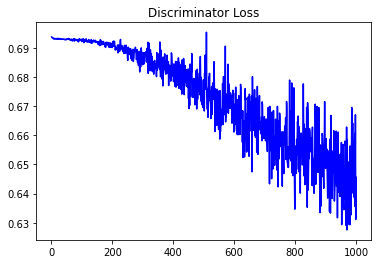

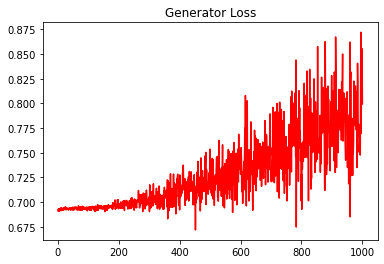

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2199123953044947


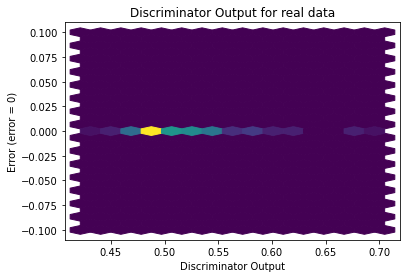

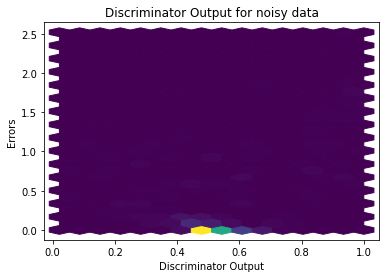

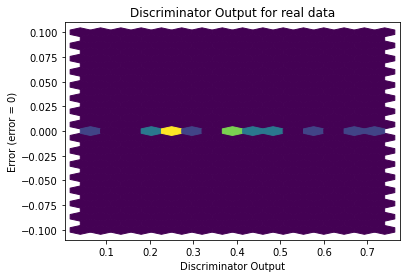

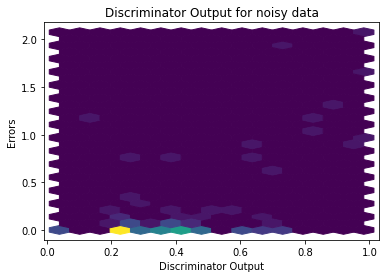

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
